In [198]:
import numpy as np
import random
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 1. 数据统计与分布

##### 众数：一组数据中出现次数最多的数，一组数据可以有多个众数，也可以没有众数。

In [3]:
### 加和值

x = np.array([1, 1, 1, 2, 4, 5, 6])

x_sum = sum(x)
x_agv = np.average(x)
x_me = np.mean(x)
x_mi = np.median(x)
x_std = np.std(x)
x_var = np.var(x)
print(f"加和值：{x_sum}, 平均值：{x_agv}, {x_me}, 中位数：{x_mi},  方差：{x_var}, 标准差：{x_std}")


加和值：20, 平均值：2.857142857142857, 2.857142857142857, 中位数：2.0,  方差：3.8367346938775504, 标准差：1.958758457257441


#### 1.1 方差 与标准差（标准偏差=方差的开放）



In [6]:
sum(np.arange(10))


45

In [79]:
from typing import List, Optional
import math


def cal_vars(X: list):
    """ 计算方差, 标准差 """
    m = sum(X)/len(X)
    varX = sum(map(lambda i: abs(i - m)**2, X))/len(X)
    stdX = math.sqrt(varX)
    
    return varX, stdX
    


### 手动计算
X = np.arange(10)
v, s = cal_vars(X)
print(f"方差1： {v}, 标准差1：{s}" )

### numpy 计算
varX = np.var(X)
stdX = np.std(X, ddof=0) ## 注意自由度ddof设置

print(f"方差2： {varX}, 标准差2：{stdX}" )

print(f"方差3： {varX}, 标准差3：{math.sqrt(varX)}" )

方差1： 8.25, 标准差1：2.8722813232690143
方差2： 8.25, 标准差2：2.8722813232690143
方差3： 8.25, 标准差3：2.8722813232690143



#### 1.2 协方差：
Cov(X, Y) = E[(X – E(X)(Y – E(Y)))]  = E[XY] – E[X]E[Y]

####
D(X+Y)=D(X)+D(Y)+2Cov(X，Y)
####
D(X-Y)=D(X)+D(Y)-2Cov(X，Y)



##### np.cov(x, y): 是把 x,y 纵向合在一起，每行为一个变量，每列为一个观测值 

方差：2.0，协方差：2.5
X协方差：2.0, Y协方差：8.0, XY协偏差： 4.0


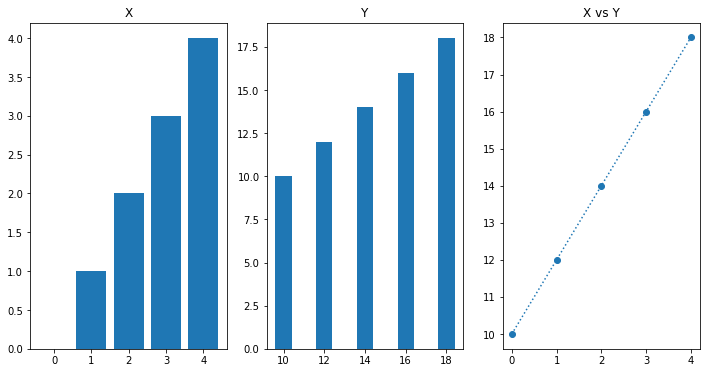

In [173]:
X = np.arange(5)
Y = np.array([10, 12, 14, 16, 18])

plt.figure(figsize=(12,6))
plt.subplot(131) ,plt.bar(X, X), plt.title("X")
plt.subplot(132) ,plt.bar(Y,Y), plt.title("Y")
plt.subplot(133) ,plt.plot(X,Y, 'o:'), plt.title("X vs Y")


covX = np.cov(X, ddof=0)
covY = np.cov(Y, ddof=0)
covXY = np.cov(X,Y, ddof=0) ## [[2,4],[4,8]], 2 x 协方差， 4：xy协方差，4：yx协方差，8：y协方差

print(f"方差：{np.var(X)}，协方差：{np.cov(X)}") #### numpy 默认自由度为1， 即为样本标准差
print(f"X协方差：{covX}, Y协方差：{covY}, XY协偏差： {covXY[0][1]}")


r = np.cov(X, ddof=0)/np.var(X)
r = covXY[0][1]/(np.std(X)*np.std(Y))


#### 1.3 皮尔逊相关性

In [183]:
tdf = pd.read_csv('../data/tips.csv')
tdf


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### 理解
 
 ##### 1. 方差（标准差要开方）： 一组样本中，各个值 与中心点的距离的平均值。 ---- 》组内

 ##### 2. 协方差：各变量间的相关性， 协方差大于0位正相关，小于零负相关，等于零不相干， 相关性的大小为皮尔逊相关性

 

 点相乘结果：8.289388917629669, 皮尔逊相关性：1.0


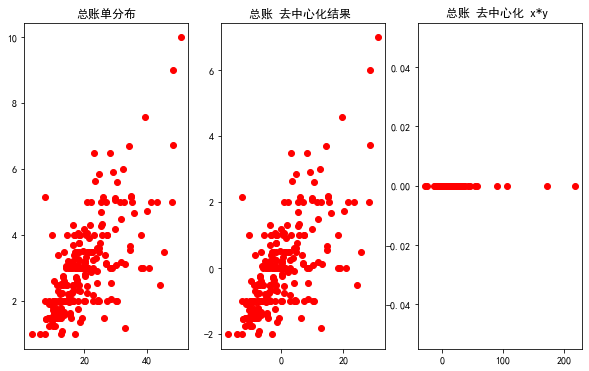

In [192]:
bill = tdf['total_bill'].values # 消费者就餐账单总额
tip = tdf['tip'].values # 消费者给服务员的小费


x_mean = list(map(lambda x: x - np.mean(bill), bill)) ### 去中心化
y_mean = list(map(lambda x: x - np.mean(tip), tip)) ### 去中心化
xy_mean = [x_mean[i] * y_mean[i] for i in range(len(x_mean))] ### 点坐标相乘


plt.figure(figsize=(10,6))
plt.subplot(131), plt.scatter(bill, tip, c='r'), plt.title("总账单分布")
plt.subplot(132), plt.scatter(x_mean, y_mean, c='r'), plt.title("总账 去中心化结果 ")
plt.subplot(133), plt.scatter(xy_mean, [0]*len(xy_mean), c='r'), plt.title("总账 去中心化 x*y ")

r = np.corrcoef(bill)
rr = np.mean(xy_mean) ### 大于零 说明X, Y为正相关（基于公式的理解）
print(f" 点相乘结果：{rr}, 皮尔逊相关性：{r}")

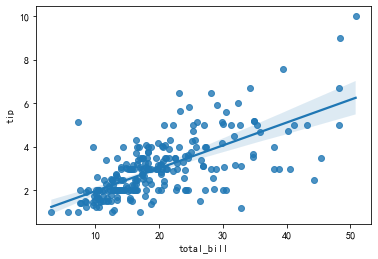

In [197]:
import seaborn as sns

sns.regplot(x='total_bill', y='tip', data=tdf)


#### sns可视化

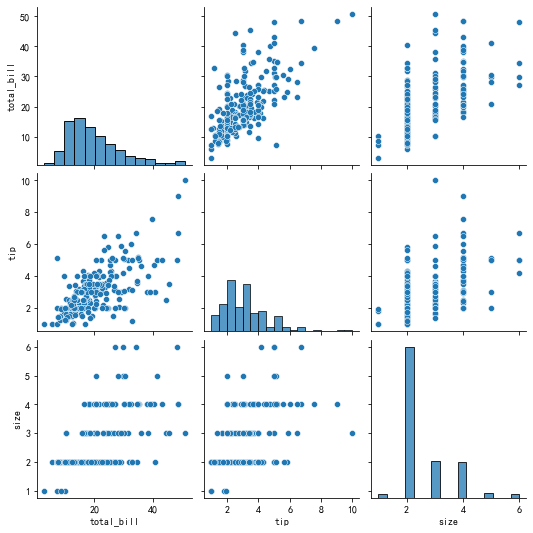

In [222]:
## 看图说话：这些图展现了数据集中消费总额、小费金额以及顾客数量三个特征（变量）之间的联系。
sns.pairplot(tdf)

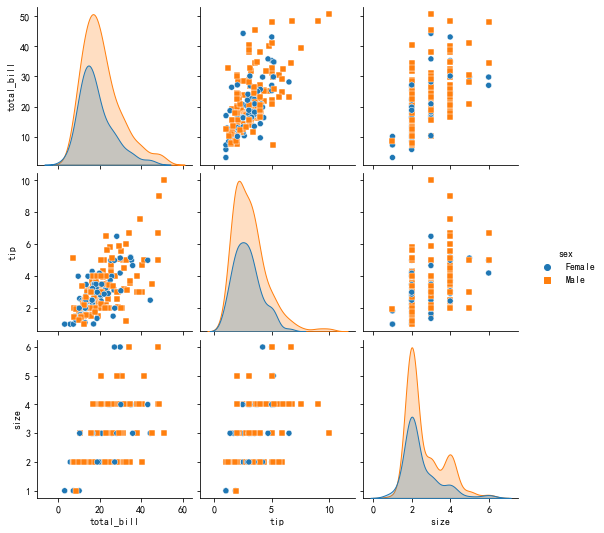

In [223]:
### #相关性图，和某一列的关系
sns.pairplot(tdf, hue='sex', markers=['o', 's'])

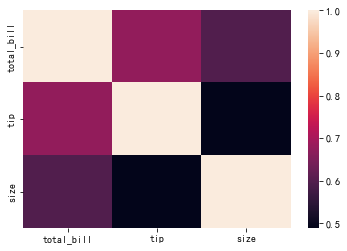

In [226]:
### 热力图， # 相关性热力图
## 看图说话：热力图可用来显示两变量之间的相关性，在这里两变量间对应的矩形框的颜色越浅，代表两者之间越具有相关性。
sns.heatmap(tdf.corr())


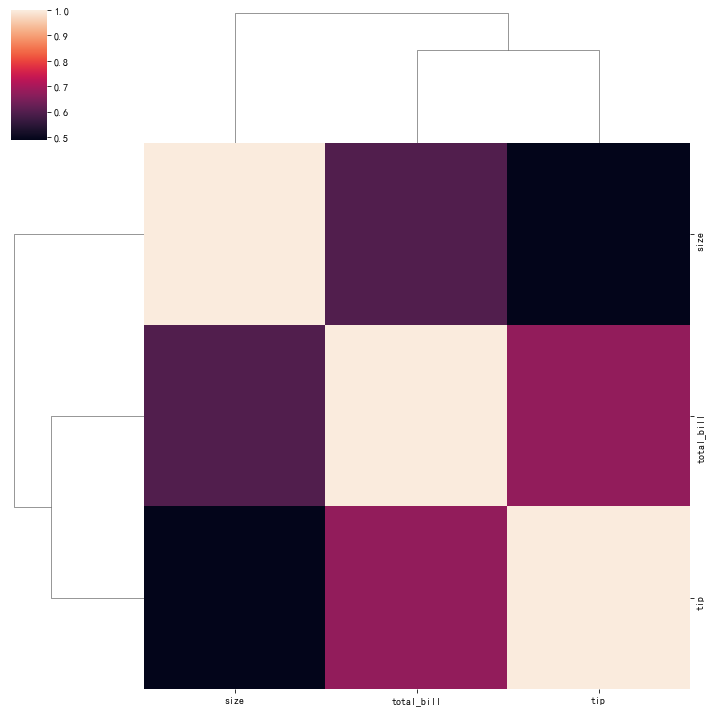

In [227]:
### # 分层相关性热力图

sns.clustermap(tdf.corr())

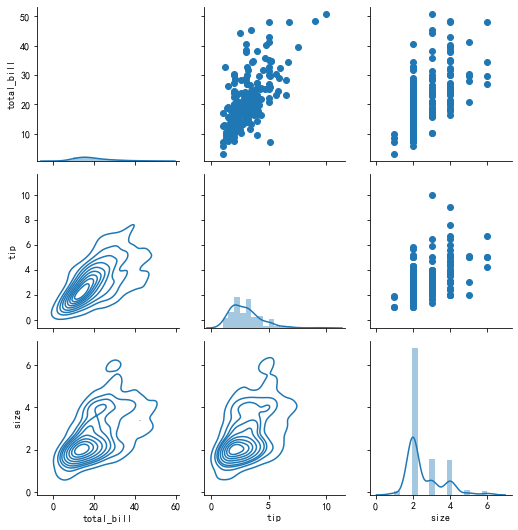

In [229]:
## 在pair grid图中，你可以根据自己需求，在这里呈现上述介绍的各种类型的图形
g = sns.PairGrid(tdf)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


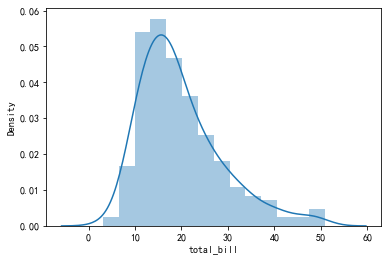

In [230]:
### 单个属性的分布
sns.distplot(tdf['total_bill'])


plt.show()

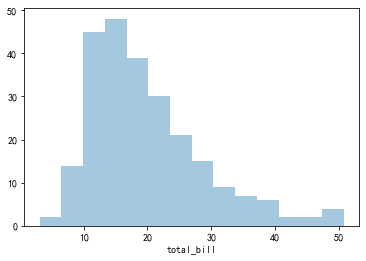

In [231]:
## dist plot图
## 上图显示，顾客在餐厅的消费总金额主要是在5-35的范围内分布的。
sns.distplot(tdf['total_bill'],kde = False)




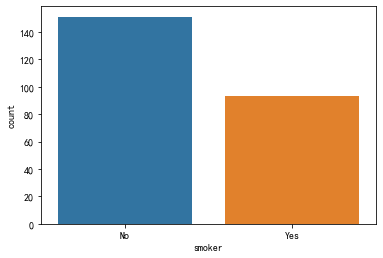

In [232]:
### 上图显示，来餐厅就餐的顾客，不抽烟者比会抽烟者多
sns.countplot(x = 'smoker', data = tdf)



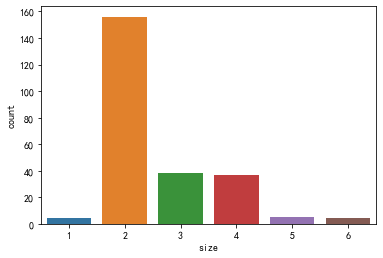

In [233]:
## 上图显示，2个人来餐厅就餐的总次数多一些。
sns.countplot(x = 'size',  data = tdf)



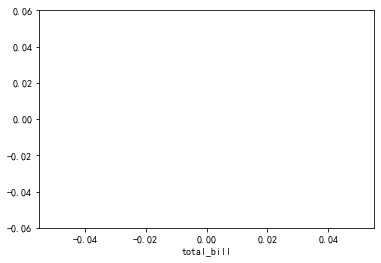

In [238]:
sns.rugplot(tdf['total_bill']) ## 上图呈现的是，顾客就餐消费总额在各个值上的边缘分布

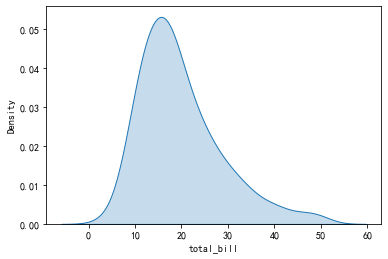

In [239]:
## KDE代表内核密度估计，它也显示了各个消费总金额数值的统计分布。

sns.kdeplot(tdf['total_bill'], shade=True)



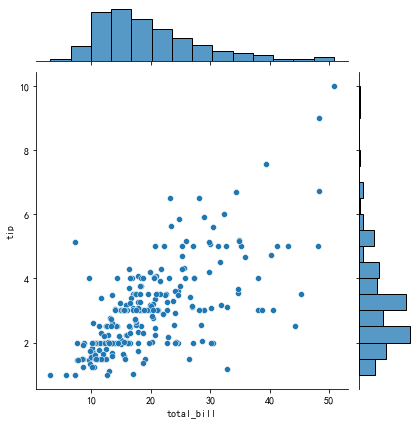

In [242]:
### 两两属性的相关性图
sns.jointplot(x = 'total_bill', y = 'tip', data = tdf)
## 上图显示，顾客主要消费水平在10-30远之间，而此时，对应给侍者小费的钱在1-5元之间。

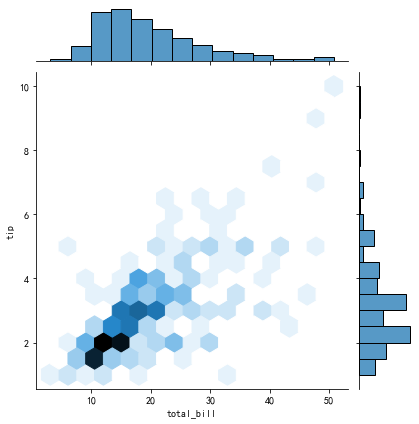

In [243]:
## 另一种清晰地可视化视图，颜色的深度代表频次。
sns.jointplot(x = 'total_bill', y = 'tip', data = tdf ,kind = 'hex')

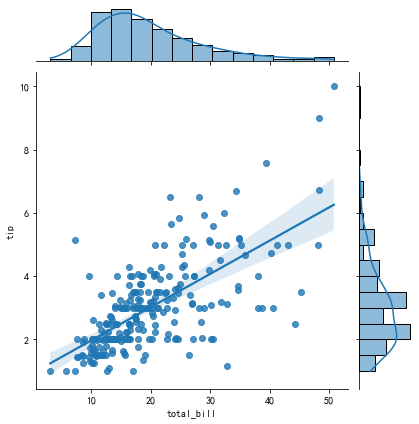

In [244]:
### 通过做一条简单的回归线，它表明了小费的金额是随着总账单金额的增加而增加的。
sns.jointplot(x = 'total_bill', y = 'tip', data = tdf ,kind = 'reg')


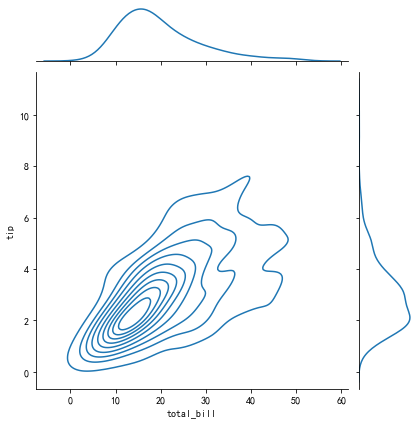

In [246]:

sns.jointplot(x = 'total_bill', y = 'tip', data = tdf ,kind = 'kde')
## 可视化统计图：某个区域越暗，表明这个区域对应的频次越多。

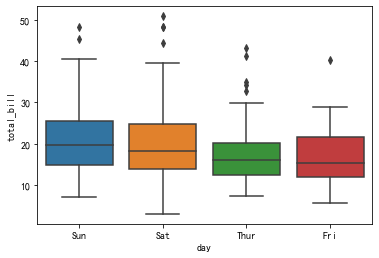

In [248]:
## box plot图: 上图显示大部分账单是在周六和周日支付的。
sns.boxplot(x = 'day', y= 'total_bill', data = tdf)

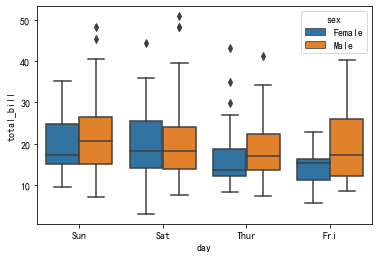

In [249]:
###  在上面的图表中你可以看到，在周六时，女性买单的次数会比男性多。（难道是因为买买买，男性付了好多钱，女性为了弥补男性的心里落差，然后请吃饭？哈哈
sns.boxplot(x = 'day', y= 'total_bill', data = tdf, hue = 'sex')


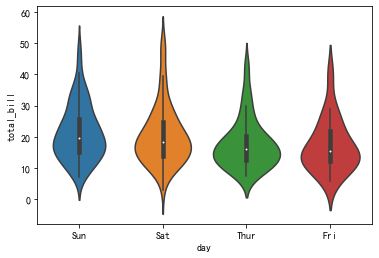

In [251]:
## violin plot: voilin plot和box plot很相似，但它结合了box plot图和密度痕迹。

sns.violinplot(x = 'day', y= 'total_bill', data = tdf)


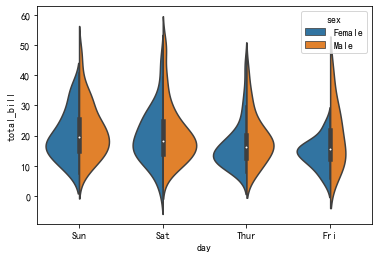

In [252]:
## 增加了性别的区分
sns.violinplot(x = 'day', y= 'total_bill', data = tdf, hue = 'sex', split = True)

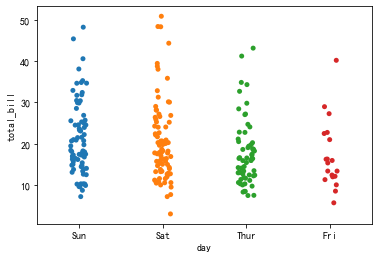

In [253]:
### strip plot图
## 这幅图呈现的是周四、周五、周六和周日这四天，顾客消费总额的散点图。

sns.stripplot(x = 'day', y = 'total_bill', data = tdf)

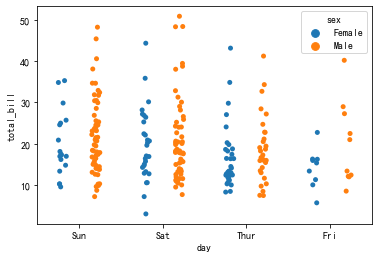

In [254]:
## 和上图一样，只不过对性别进行了区别。
sns.stripplot(x = 'day', y = 'total_bill', data = tdf, jitter= True,hue = 'sex', dodge = True)

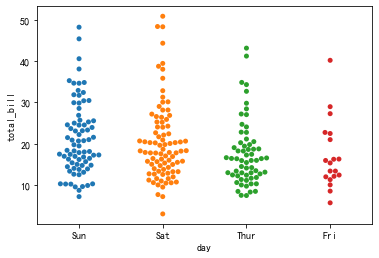

In [256]:
### swarm plot图
### Swarn plot和stripplot比较类似，但Swarn plot的不同之处在于它不会重叠数据点。

sns.swarmplot(x = 'day', y = 'total_bill', data = tdf)

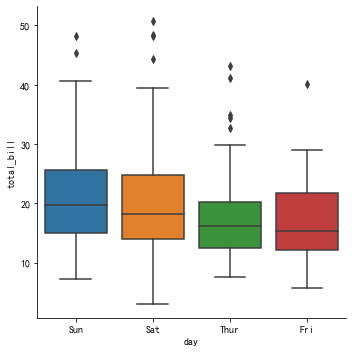

In [257]:
### factor plot图: 在factorplot图中，你可以给出任何你需要显示的图形。

sns.factorplot(x = 'day', y = 'total_bill', kind = 'box', data = tdf)
